<a href="https://colab.research.google.com/github/swjh9523/KaggleStruggle/blob/main/Kaggle_Loan_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 캐글 대출고객 분류분석


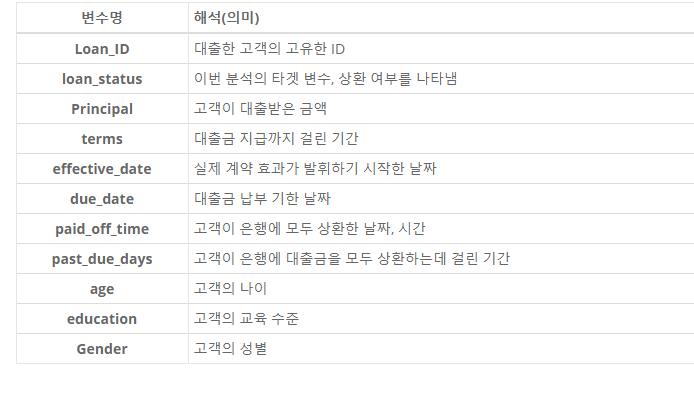

## 준비작업

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import missingno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


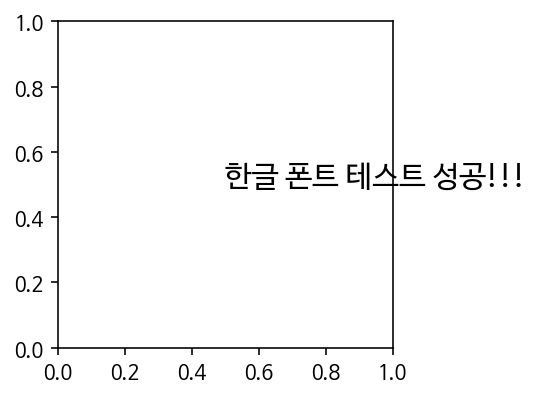

In [2]:
# 그래프 한글폰트 사용설정 in Colab
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [3]:
df = pd.read_csv('/content/drive/MyDrive/데이터파일/Loan payments data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64
AxesSubplot(0.125,0.125;0.698618x0.755)


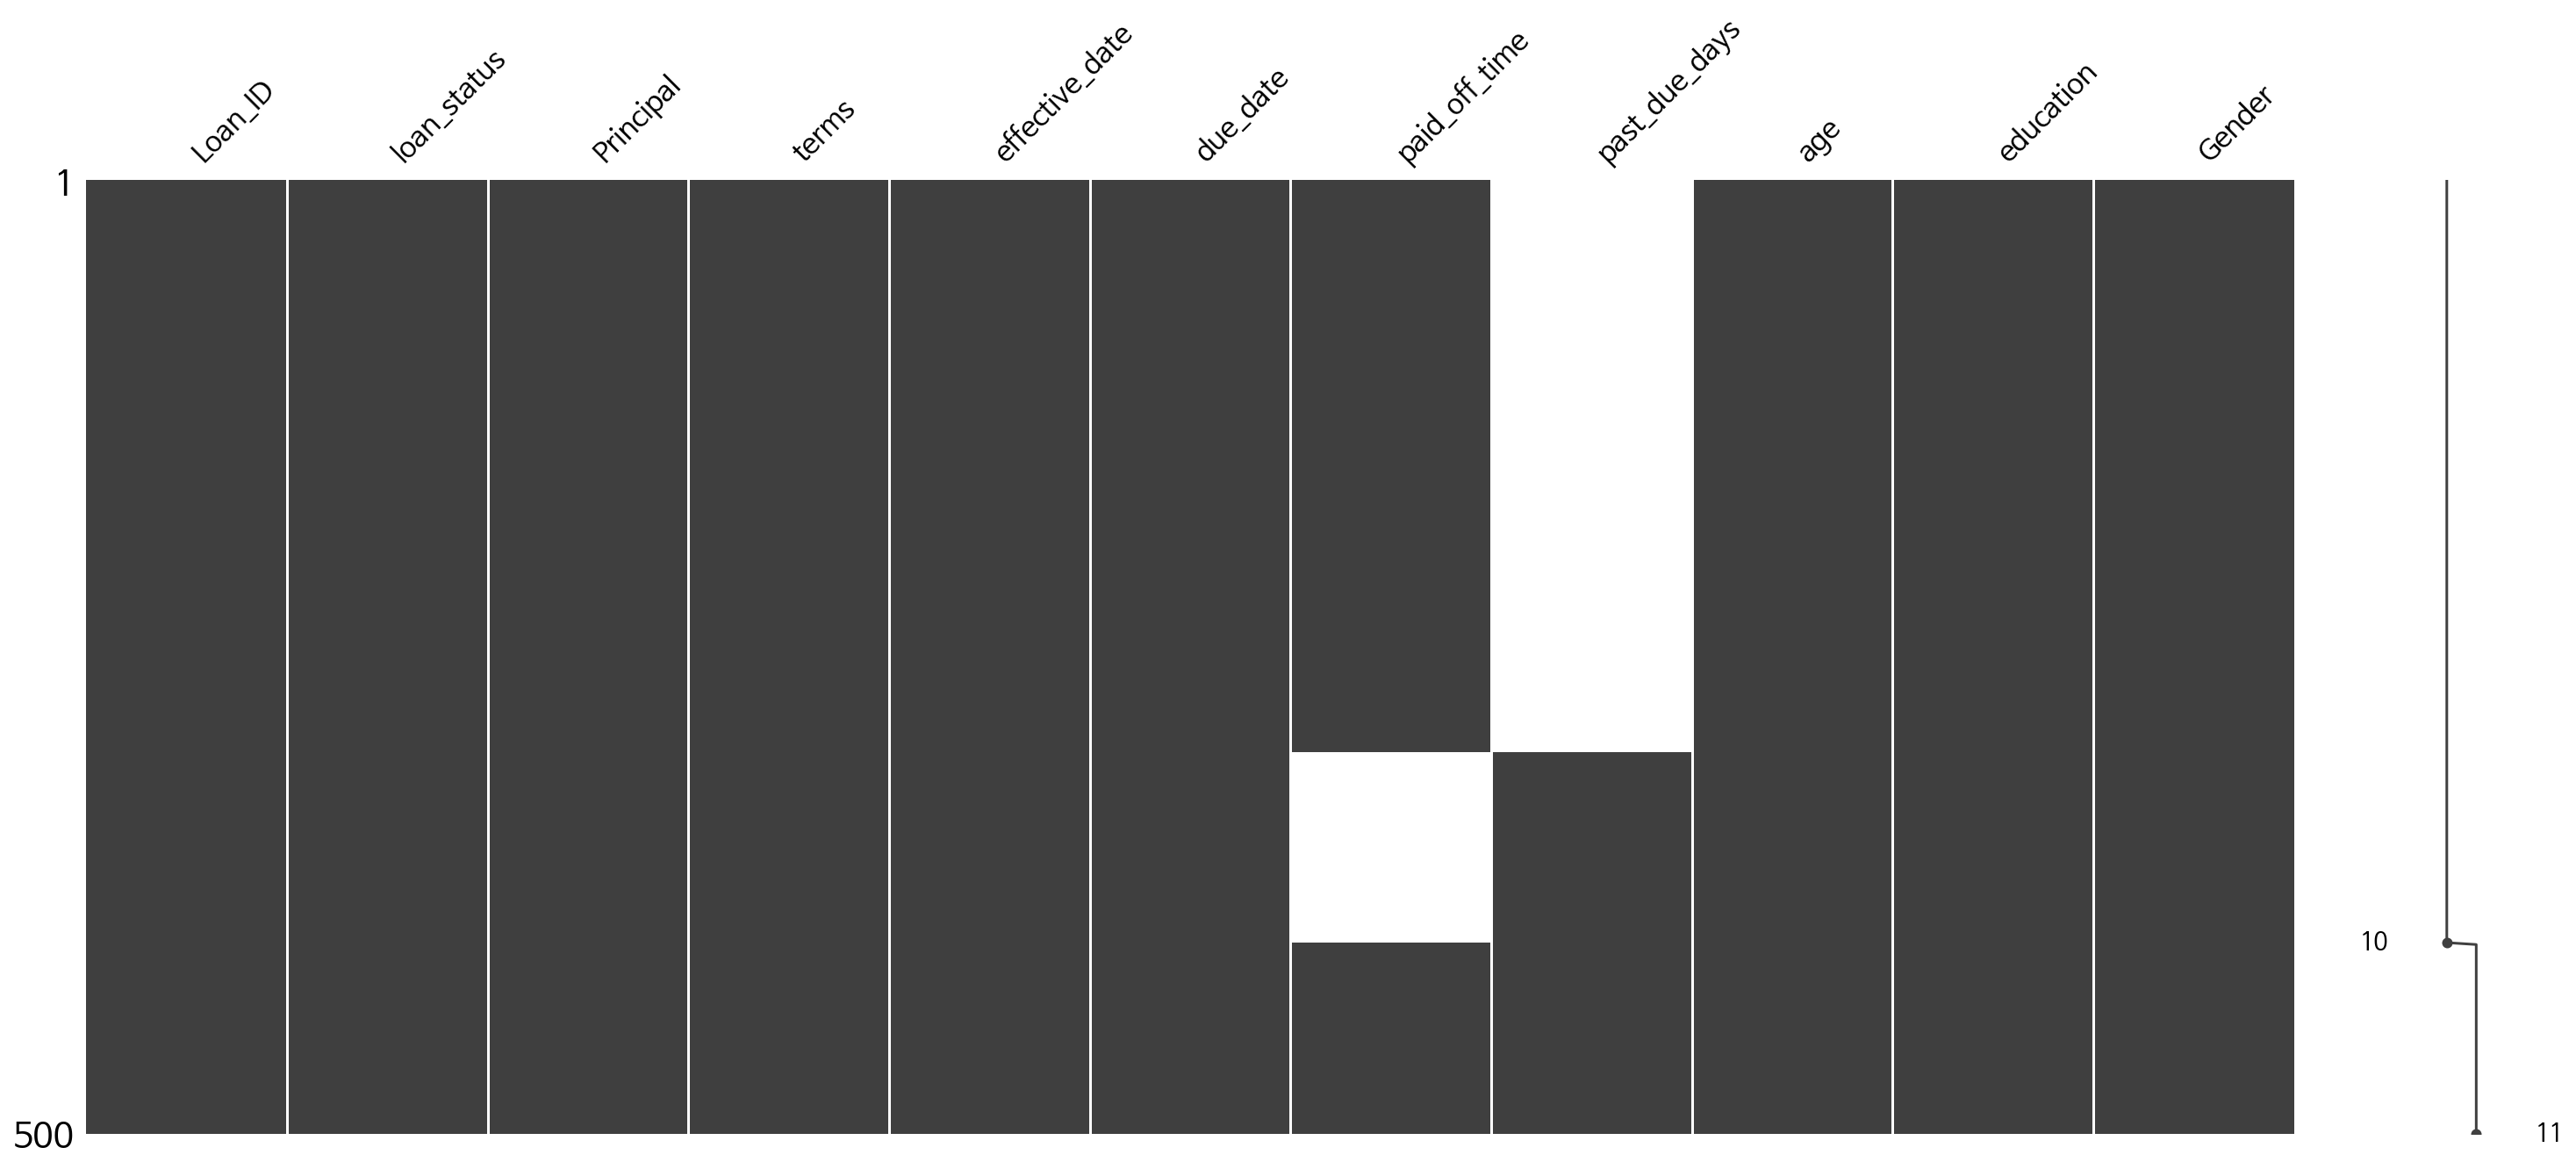

In [5]:
# 결측치 확인
print(df.isnull().sum())
print(missingno.matrix(df))

In [6]:
# 결측치가 있는 컬럼 모아보기

df[['paid_off_time','past_due_days']]

,paid_off_time,past_due_days
0,9/14/2016 19:31,NaN
1,10/7/2016 9:00,NaN
2,9/25/2016 16:58,NaN
3,9/22/2016 20:00,NaN
4,9/23/2016 21:36,NaN
...,...,...
495,10/14/2016 19:08,3.0
496,10/10/2016 20:02,14.0
497,9/29/2016 11:49,3.0
498,11/11/2016 22:40,1.0


In [7]:
# 분석에 불필요한 컬럼 제거
df.drop(['Loan_ID','paid_off_time','past_due_days'],axis=1, inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


In [8]:
# 개별 유니크 값 확인

print(df['terms'].unique())
print('\n',df['Principal'].unique())
print('\n',df['effective_date'].unique())
print('\n',df['due_date'].unique())
print('\n',df['education'].unique())

[30 15  7]

 [1000  300  800  900  700  500]

 ['9/8/2016' '9/9/2016' '9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016'
 '9/14/2016']

 ['10/7/2016' '9/22/2016' '10/8/2016' '9/15/2016' '9/24/2016' '9/16/2016'
 '10/9/2016' '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016'
 '9/18/2016' '9/26/2016' '10/26/2016' '10/11/2016' '11/10/2016'
 '9/19/2016' '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016'
 '11/12/2016' '9/23/2016' '11/7/2016']

 ['High School or Below' 'Bechalor' 'college' 'Master or Above']


In [9]:
import datetime as dt

df['effective_date'].astype('datetime64')

0     2016-09-08
1     2016-09-08
2     2016-09-08
3     2016-09-08
4     2016-09-09
         ...    
495   2016-09-12
496   2016-09-12
497   2016-09-12
498   2016-09-12
499   2016-09-12
Name: effective_date, Length: 500, dtype: datetime64[ns]

## EDA

* loan_status
  - 정해진 기간 내에 대출금을 모두 상환하는데 성공한 고객, 실패한 고객

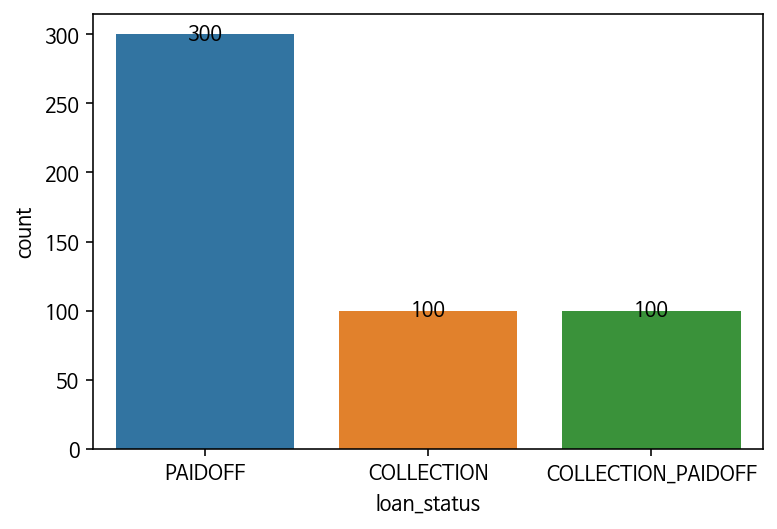

In [ ]:
# 정해진 기간내에 대출금을 상환했는지 여부에 대한 시각화
g = sns.countplot(data=df, x='loan_status')

# 데이터레이블 값 표시를 위한 연산
counts = df['loan_status'].value_counts()
for i, val in enumerate(counts.index):
    g.text(x=i, y=counts[i], s=counts[i],  horizontalalignment='center',verticalalignment='center')

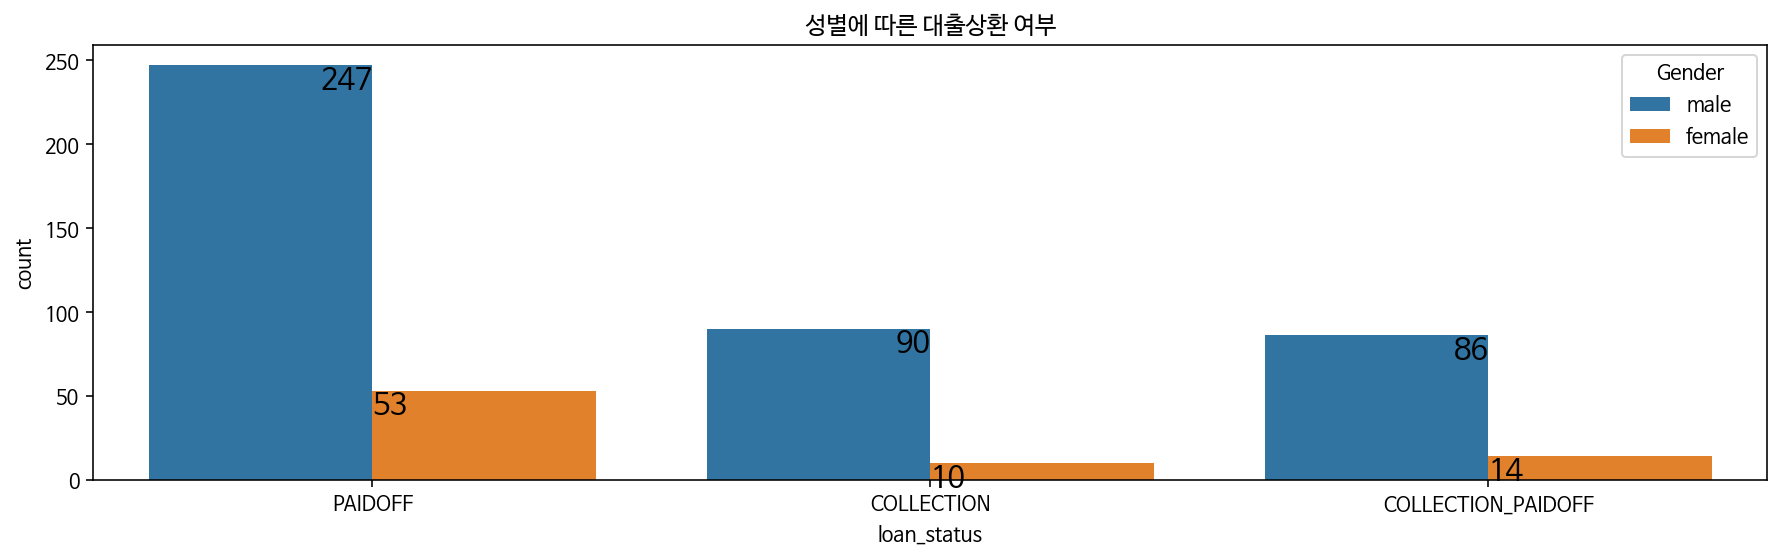

In [ ]:
# 성별에 따른 정해진 기간내에 대출금을 상환했는지 여부에 대한 시각화
plt.figure(figsize=(15,4))
plt.title('성별에 따른 대출상환 여부')
g = sns.countplot(data=df, x='loan_status', hue='Gender')

# 데이터레이블 표시를 위한 연산
table_df = df.groupby(['loan_status','Gender'])['loan_status'].count().unstack().reset_index()
table_df.columns = ['loan_stat', 'F','M']
table_df.sort_values(ascending=False, by='M',inplace=True)
index_no = 0
for i, val in table_df.iterrows():
  Male = val["M"]
  Female = val['F']
  g.text(x=index_no, y=Male, s=Male, horizontalalignment='right',verticalalignment='top',fontsize=15)
  g.text(x=index_no, y=Female, s=Female, horizontalalignment='left', verticalalignment='top',fontsize=15)
  index_no = index_no + 1

* Principal
  * 고객들이 빌린 대출금에 대한 시각화

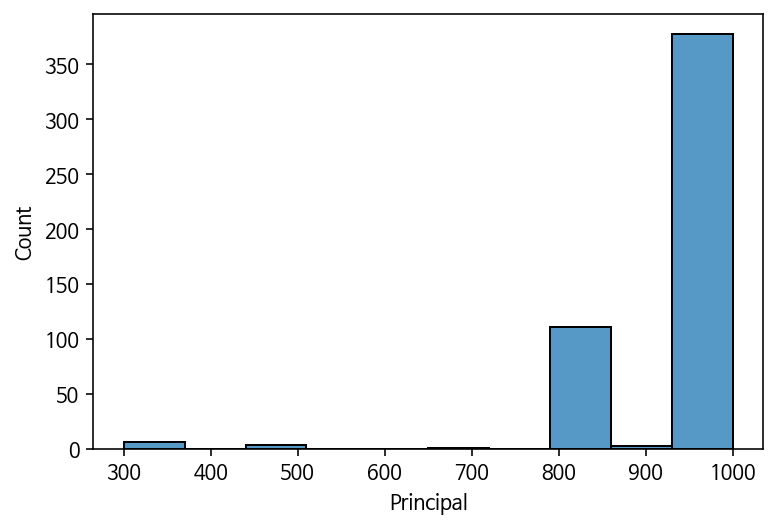

In [ ]:
# 대출금 변수의 분포를 확인하기 위한 히스토그램

g = sns.histplot(data=df, x='Principal')

   Principal  freq
0       1000   377
1        800   111
2        300     6
3        500     3
4        900     2
5        700     1


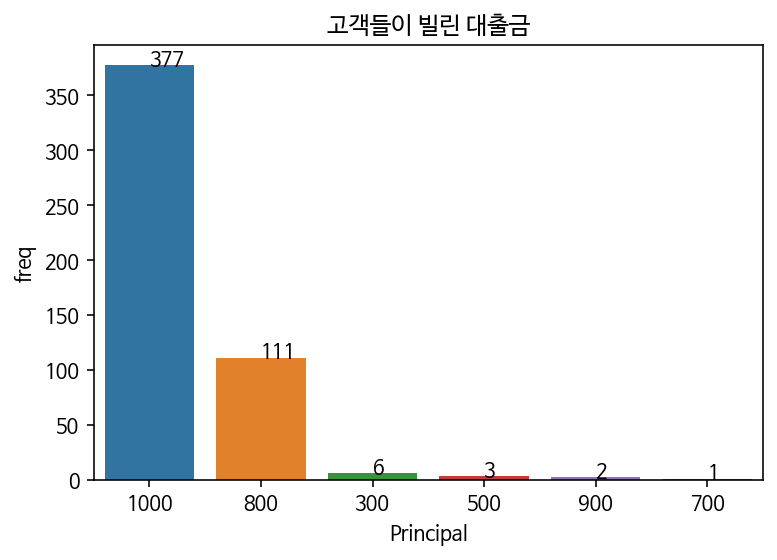

In [ ]:
# 대출금별로 그룹화하고 빈도수를 구하여 막대그래프로 시각화.
plt.title('고객들이 빌린 대출금')
gg = sns.barplot(data=df_Principal, x='Principal', y='freq',order=df_Principal['Principal'])

# 데이터 레이블 표시를 위한 연산
df_Principal = df['Principal'].value_counts().reset_index()
df_Principal.columns = ['Principal', 'freq']
df_Principal.sort_values(by='freq', ascending=False,inplace=True)
print(df_Principal)
for i, val in enumerate(df_Principal['freq'].index):
  gg.text(x=i, y=df_Principal['freq'][i], s=df_Principal['freq'][i])

-> Principal(고객이 대출받은 금액) 변수에 대해 대출금 별로 그룹화 하여 시각화 해본 결과 300~1000까지 있음을 알아냈습니다. 그래프에서 확인할 수 있듯이 연속적인 분포를 이루고 있지 않으며, 800과 1000을 대출받은 고객들이 가장 많음을 알 수 있었습니다.

---

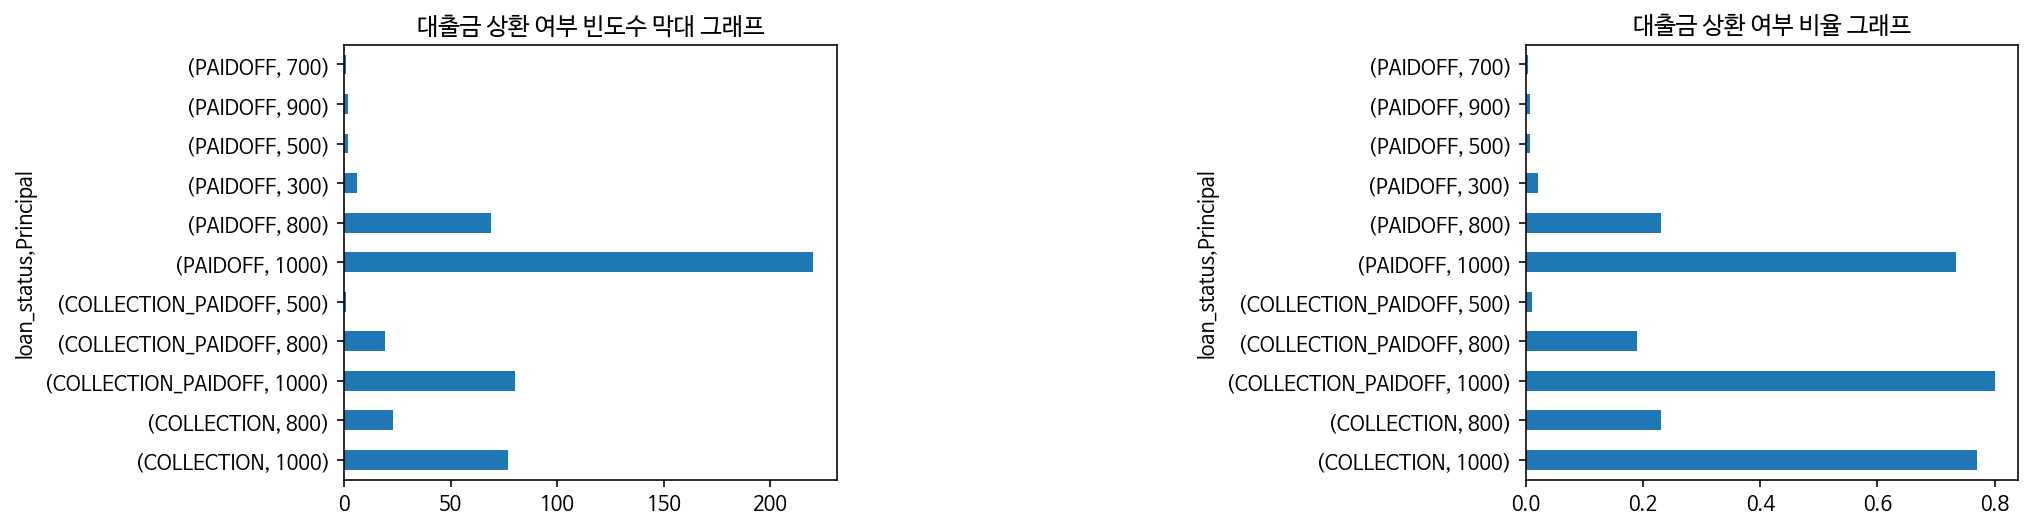

In [ ]:
# 대출금별로 상환에 성공한 고객들과 실패한 고객들의 빈도수와 비율을 한 화면에 같이 plotting 해보도록 하겠습니다.

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.title('대출금 상환 여부 빈도수 막대 그래프')
df.groupby(['loan_status'])['Principal'].value_counts().plot.barh()
plt.subplot(133)
plt.title('대출금 상환 여부 비율 그래프')
df.groupby(['loan_status'])['Principal'].value_counts(normalize=True).plot.barh()

-> 상대적으로 고액인 800 이상을 대출 받은 고객들이 대출금 상환에 실패할 가능성이 더 높은 것을 알 수 있습니다.

---

* terms
  * 고객이 은행과 계약한 이후에 대출금을 지급받기까지 걸린 시간을 나타내는 연속형 변수입니다.
  

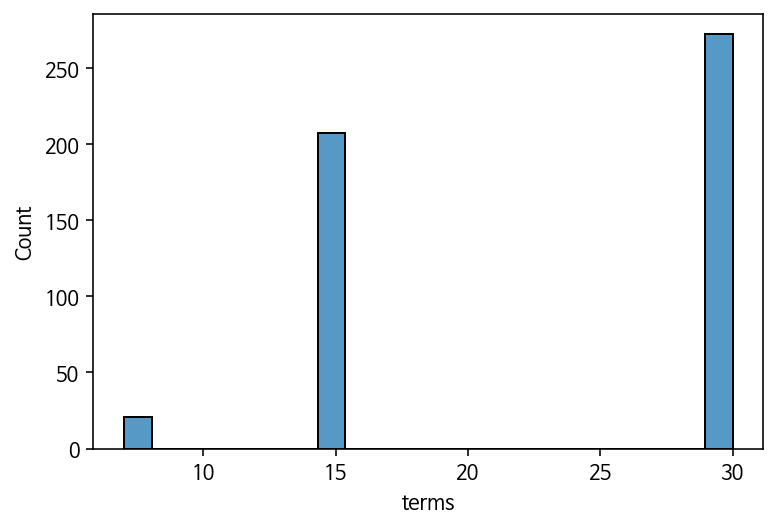

In [ ]:
# 간격을 쪼개서 히스토그램 시각화
sns.histplot(data=df, x='terms',bins=np.linspace(start=7,stop=30,num=23))

-> 대출금을 지급받기까지 7일, 14일, 30일이 걸린 고객들만 존재한다.

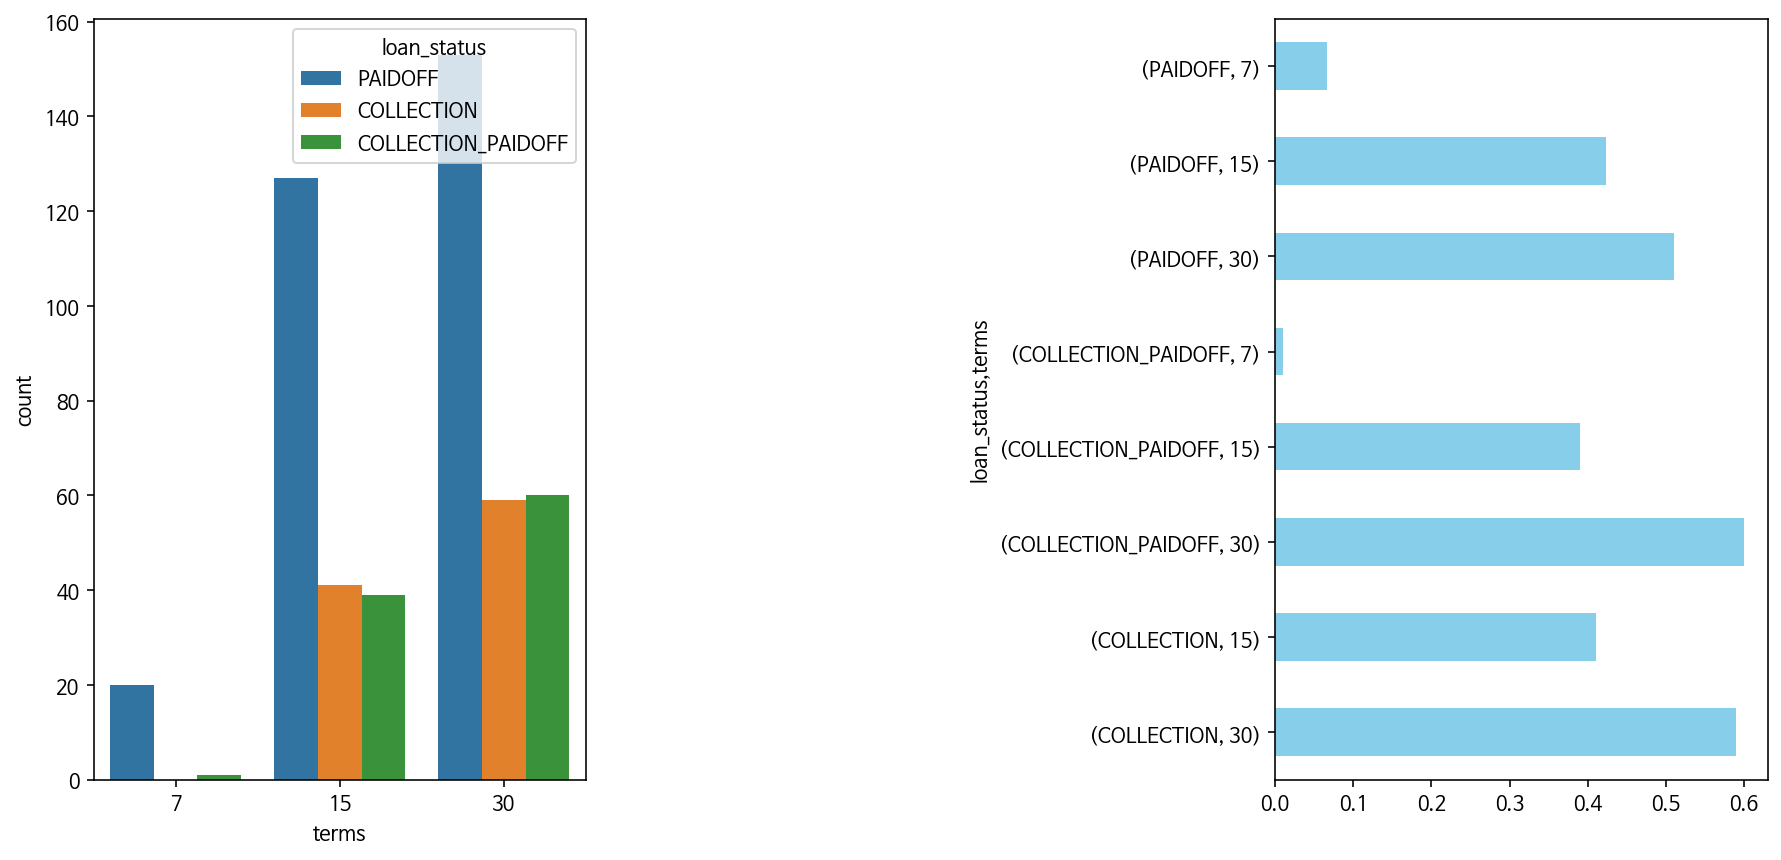

In [ ]:
# 대출상환 여부에 따른 terms 변수를 막대그래프와 비율 막대그래프로시각화
plt.figure(figsize=(15,7))
plt.subplot(131)
sns.countplot(data=df, x='terms',hue='loan_status')
plt.subplot(133)
df.groupby(['loan_status'])['terms'].value_counts(normalize=True).plot.barh(color="Skyblue")

-> PAIDOFF(대출상환)은 15일과 30일 걸린 고객이 가장 많았으며, 대출금 지급이 늦어질수록 기한내에 상환할 가능성이 낮아짐을 알 수 있다.

* effective_date
  * 고객이 은행으로부터 대출금을 지급받아서 계약 효력이 발생한 날짜를 의미.
  * 2016-09-08부터 2016-09-14까지 7개의 범주형 변수.
  * 순서대로 목, 금, 토, 일, 월. 화, 수

In [ ]:
df['due_date'] = df['due_date'].astype('datetime64')
df['effective_date'] = df['effective_date'].astype('datetime64')
df['date'] = df['due_date'].astype('datetime64') - df['effective_date'].astype('datetime64')
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,date
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29 days
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,29 days
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29 days
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14 days
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29 days


No handles with labels found to put in legend.


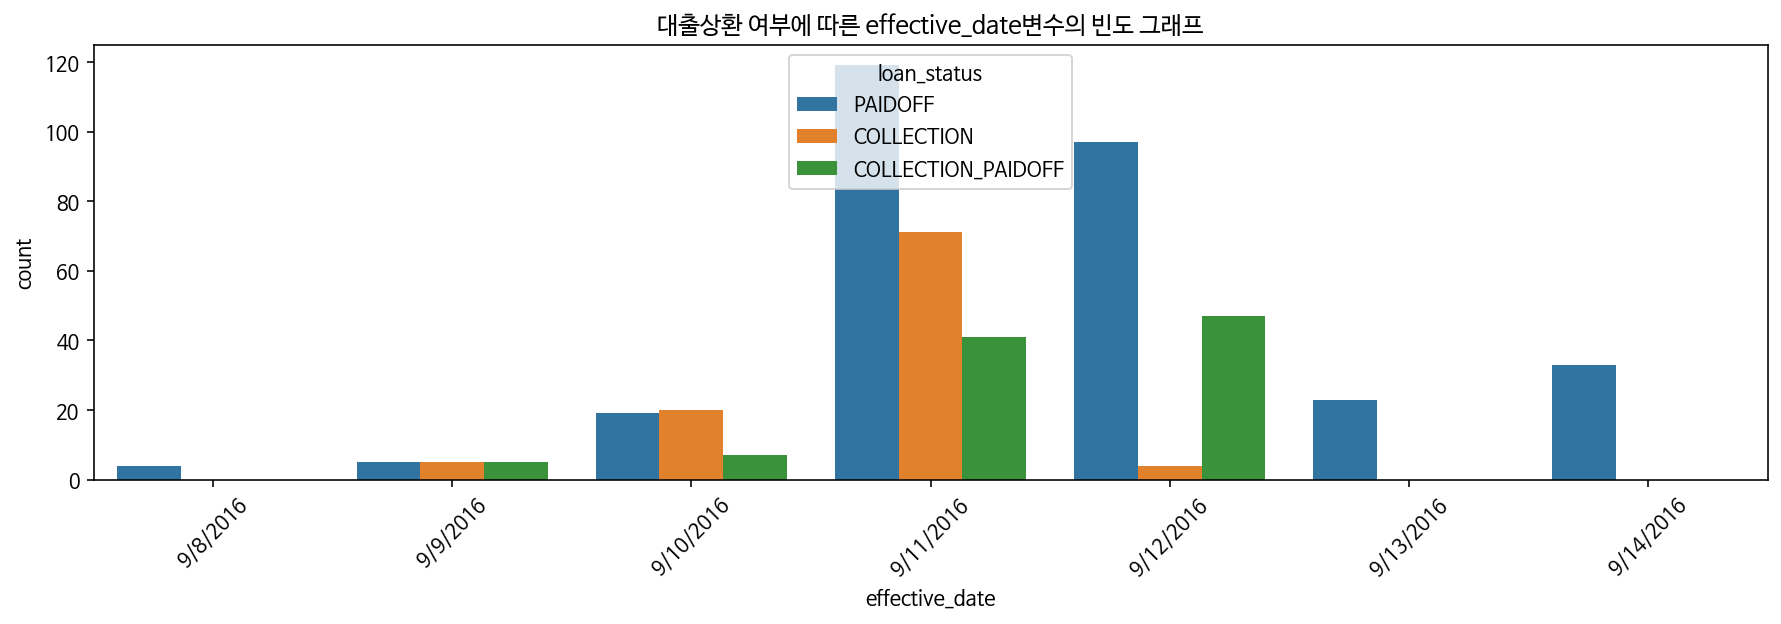

In [ ]:
plt.figure(figsize=(15,4))
plt.title('대출상환 여부에 따른 effective_date변수의 빈도 그래프')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xticks(rotation=45)
sns.countplot(data=df, x='effective_date',hue='loan_status')

-> 일요일, 월요일에 대출금을 지급받은 고객이 가장 많음을 알 수 있다.

---

* due_date
  * 대출금을 모두 상환하기로 계약한 날짜를 의미함.

In [ ]:
table_df2

,due_date,loan_status
0,10/10/2016,123
1,10/11/2016,69
2,10/12/2016,8
3,10/13/2016,21
4,10/25/2016,4
5,10/26/2016,4
6,10/7/2016,3
7,10/8/2016,7
8,10/9/2016,28
9,11/10/2016,10


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


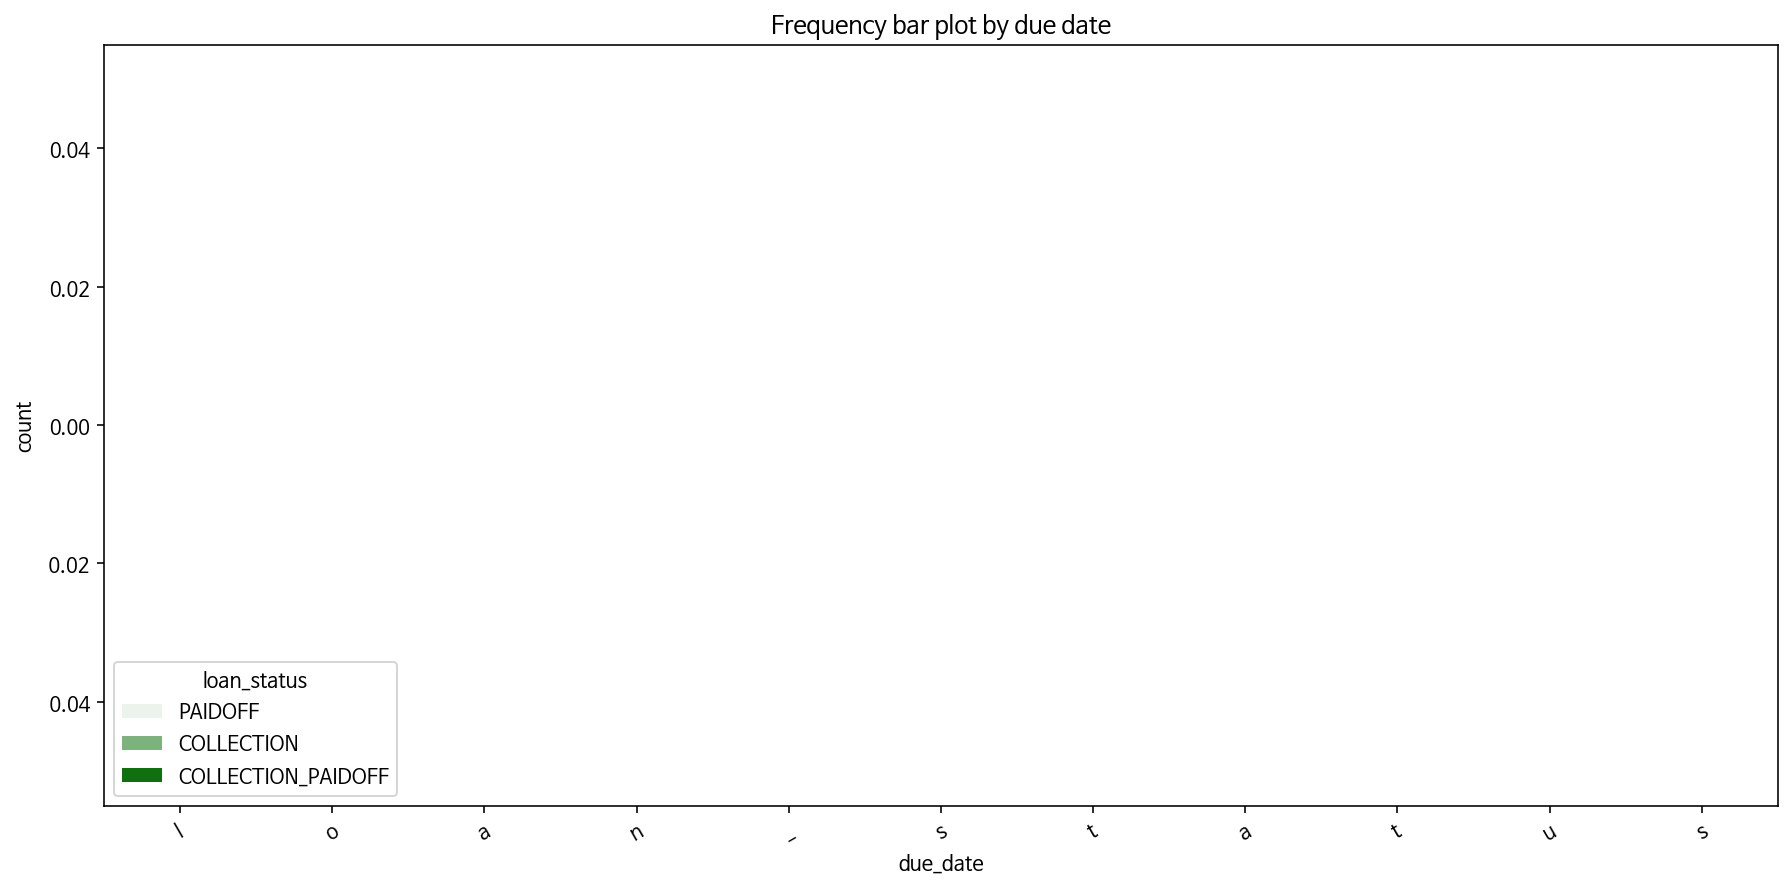

In [ ]:
# 데이터레이블 표시를 위한 연산
table_df2 = df.groupby(['due_date'])['loan_status'].count().reset_index()
# table_df.sort_values(ascending=False, by='M',inplace=True)


plt.figure(figsize=(15,7))
plt.title('Frequency bar plot by due date')
plt.xticks(rotation=30)
h = sns.countplot(data=df, x='due_date', hue='loan_status',color='Green',order='loan_status')

index_no = 0
for i, val in table_df2.iterrows():
  due_date = val["due_date"]
  loan_status = val['loan_status']
  h.text(x=index_no, y=loan_status, s=loan_status, horizontalalignment='center',verticalalignment='center_baseline')
  # h.text(x=index_no, y=due_date, s=due_date, horizontalalignment='left', verticalalignment='top',fontsize=15)
  index_no = index_no + 1

In [ ]:
# df_loan['loan_status'] = (df_loan['loan_status'] =="PAIDOFF").astype('int')

# df_loan.head()

df_loan['loan_status'].value_counts()

1    300
0    200
Name: loan_status, dtype: int64

In [ ]:
# # 변수변환하기
# from sklearn.preprocessing import LabelEncoder

# # # loan_status 2 = PAID OFF , 1 = COLLECTION , 0 = COLLECTION_PAID_OFF
# # le_loan = LabelEncoder()
# # le_loan.fit(df['loan_status'])
# # df['loan_status'] = le_loan.transform(df['loan_status'])

# # 성별  0 = male, 1 = female
# le_Gender = LabelEncoder()
# le_Gender.fit(df_loan['Gender'])
# df_loan['Gender'] = le_Gender.transform(df_loan['Gender'])

# # Education 0 = Bechalor, 1 = High School or Below, 2 = Master or Above ,3 = college
# le_edu = LabelEncoder()
# le_edu.fit(df_loan['education'])
# df_loan['education'] = le_edu.transform(df_loan['education'])


# # print('\n',le_loan.inverse_transform(df_loan['loan_status']))
# print('\n',le_Gender.inverse_transform(df_loan['Gender']))
# print('\n',le_edu.inverse_transform(df_loan['education']))
def format_features(df):
  features = ['loan_status','education','Gender']
  for feature in features:
    le = LabelEncoder()
    le.fit(df[feature])
    df[feature] = le.transform(df[features])
  return df


  

In [12]:
!pip install pycaret

     |████████████████████████████████| 266kB 8.9MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 276kB 16.1MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 215kB 23.2MB/s 
     |████████████████████████████████| 6.8MB 37.3MB/s 
     |████████████████████████████████| 245kB 56.4MB/s 
     |████████████████████████████████| 1.7MB 48.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 14.2MB 236kB/s 
     |████████████████████████████████| 2.0MB 53.0MB/s 
     |████████████████████████████████| 1.2MB 45.4MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 1.1MB 53.0MB/s 
     |████████████████████████████████| 3.2MB 46.9MB/s

In [13]:
from pycaret.classification import *
model = setup(
    data=df,
    target='loan_status'
)

,Description,Value
0,session_id,1946
1,Target,loan_status
2,Target Type,Multiclass
3,Label Encoded,"COLLECTION: 0, COLLECTION_PAIDOFF: 1, PAIDOFF: 2"
4,Original Data,"(500, 8)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
compare_models(exclude = None,
               include=None,
               fold=10,
               round=4,
               sort='Accuracy',
               n_select = 1,
               budget_time = 0,
               turbo=True,
               verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6190,0.0000,0.4315,0.5340,0.5586,0.2046,0.2352,0.014
lr,Logistic Regression,0.6048,0.7013,0.4170,0.5161,0.5422,0.1723,0.2042,0.389
rf,Random Forest Classifier,0.6046,0.7154,0.4718,0.5914,0.5911,0.2546,0.2597,0.458
lda,Linear Discriminant Analysis,0.5932,0.7016,0.4268,0.5236,0.5469,0.1877,0.2044,0.016
ada,Ada Boost Classifier,0.5875,0.6807,0.4203,0.5329,0.5438,0.1801,0.2007,0.085
et,Extra Trees Classifier,0.5875,0.6760,0.4977,0.6017,0.5892,0.2673,0.2709,0.442
dt,Decision Tree Classifier,0.5759,0.6541,0.5064,0.6036,0.5826,0.2691,0.2735,0.015
gbc,Gradient Boosting Classifier,0.5591,0.6874,0.3866,0.4968,0.5189,0.1159,0.1211,0.232
lightgbm,Light Gradient Boosting Machine,0.5530,0.6536,0.3960,0.5090,0.5244,0.1308,0.1340,0.087
knn,K Neighbors Classifier,0.4987,0.5957,0.3743,0.4777,0.4835,0.0730,0.0746,0.118


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1946,
                solver='auto', tol=0.001)

In [ ]:
from sklearn.model_selection import train_test_split
target_df = df_loan['loan_status'].copy()
features_df = df_loan.drop(['loan_status','effective_date','due_date','date'],axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df,
                                                    test_size = 0.2, random_state = 11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습 / 예측 / 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 예측 정확도 : ',round(accuracy_score(y_test, dt_pred),4))

# RandomForestClassifier 학습 / 예측 / 평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 예측 정확도 : ',round(accuracy_score(y_test, rf_pred),4))

# LogisticRegreesion 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegreesion 예측 정확도 : ',round(accuracy_score(y_test, lr_pred),4))

DecisionTreeClassifier 예측 정확도 :  0.47
RandomForestClassifier 예측 정확도 :  0.5
LogisticRegreesion 예측 정확도 :  0.58
